In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn import tree
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

from scipy.stats import poisson

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import export_graphviz
import pydot

#ROC
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
####

from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

import time
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("data.csv",encoding="UTF-8")

In [5]:
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT              object 
 18  LA

In [11]:
le = preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

In [12]:
le = preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == float:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

In [10]:
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,3,2,1,25,143,14,13056,...,8,44,44,21,216,0,0,0,69,12
1,1,7,0,2,7,1,29,191,6,13056,...,3,44,44,21,216,0,0,0,69,12
2,1,7,0,1,7,1,27,199,6,13056,...,18,44,44,21,216,0,0,0,69,12
3,1,7,0,1,9,1,27,180,6,13056,...,2,44,44,21,216,0,0,0,69,12
4,1,7,0,0,7,1,10,182,15,13056,...,1,44,44,21,216,0,0,0,69,12


In [35]:
#estrutura do dataset
data.shape

(6489062, 26)

In [36]:
#colunas do dataset
data.columns

Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'AWND'],
      dtype='object')

In [37]:
#informações do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype
---  ------                         -----
 0   MONTH                          int64
 1   DAY_OF_WEEK                    int64
 2   DEP_DEL15                      int64
 3   DEP_TIME_BLK                   int32
 4   DISTANCE_GROUP                 int64
 5   SEGMENT_NUMBER                 int64
 6   CONCURRENT_FLIGHTS             int64
 7   NUMBER_OF_SEATS                int64
 8   CARRIER_NAME                   int32
 9   AIRPORT_FLIGHTS_MONTH          int64
 10  AIRLINE_FLIGHTS_MONTH          int64
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64
 12  AVG_MONTHLY_PASS_AIRPORT       int64
 13  AVG_MONTHLY_PASS_AIRLINE       int64
 14  FLT_ATTENDANTS_PER_PASS        int64
 15  GROUND_SERV_PER_PASS           int64
 16  PLANE_AGE                      int64
 17  DEPARTING_AIRPORT              int32
 18  LATITUDE                       int64
 19  

<AxesSubplot:xlabel='MONTH'>

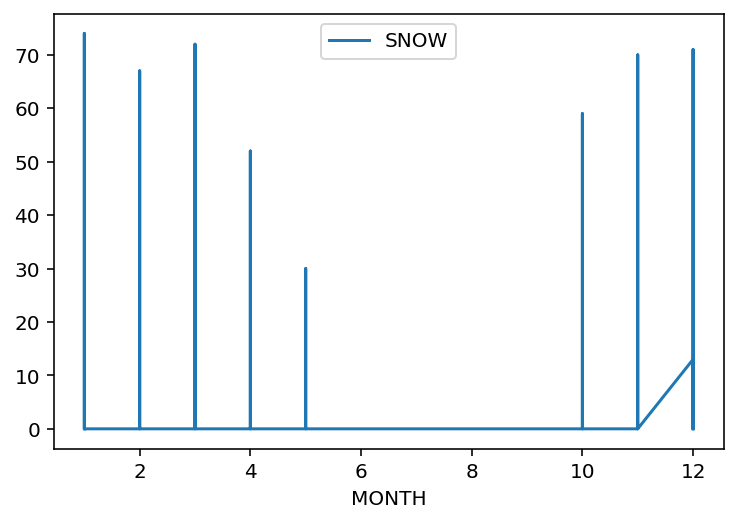

In [38]:
#Gráfico 
data.plot("MONTH", "SNOW")

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='SNOW'>

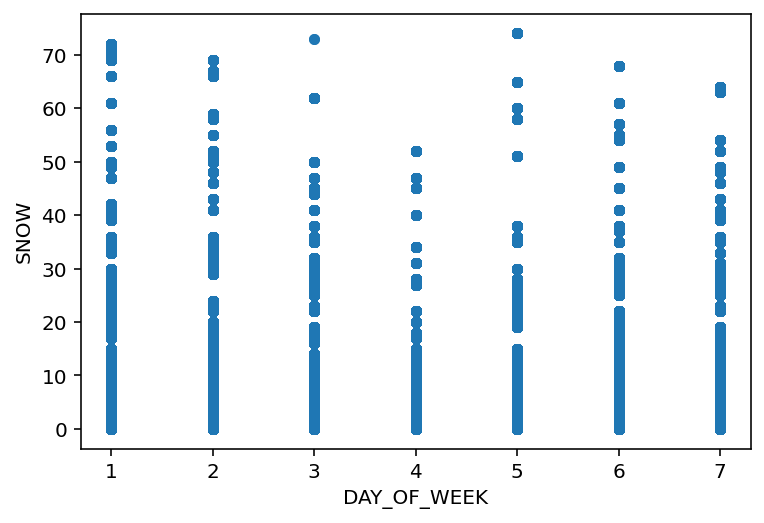

In [39]:
#Scatterplot matrix plot
data.plot(kind='scatter',x='DAY_OF_WEEK',y='SNOW')

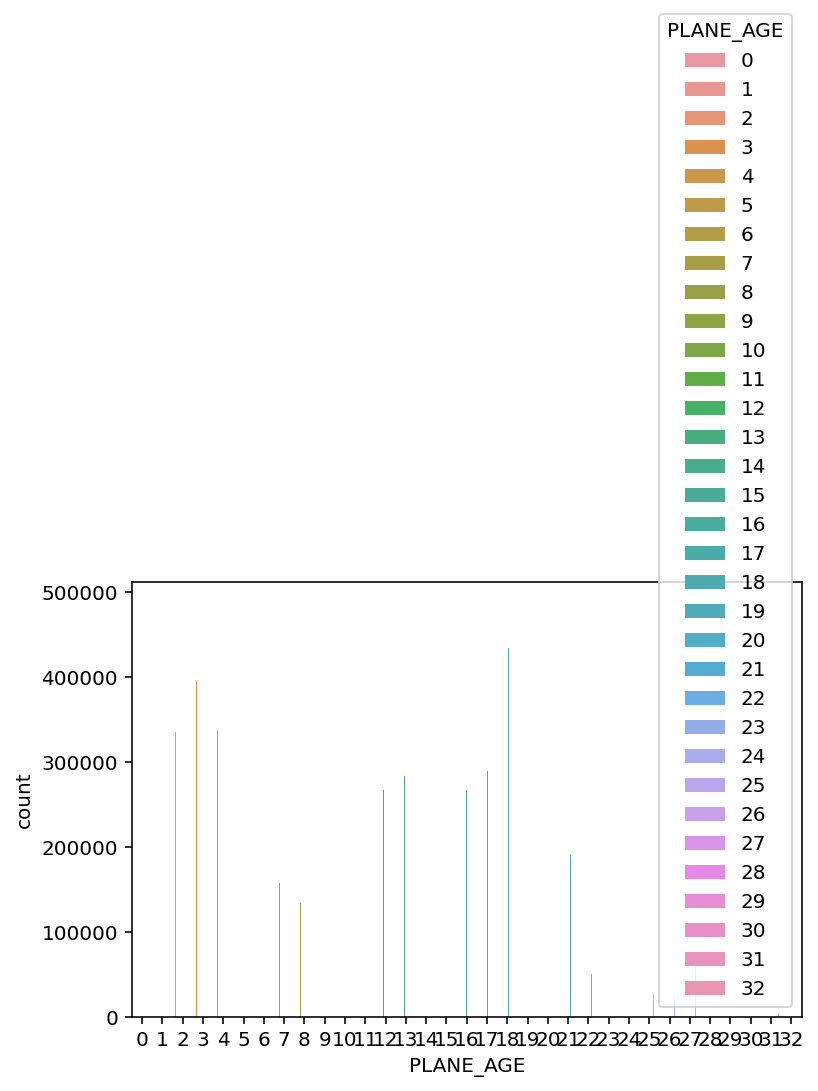

In [40]:
#Gráfico de barras da coluna Departure Time
sns.countplot(x="PLANE_AGE", hue="PLANE_AGE", data=data);

C:\Users\joao\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

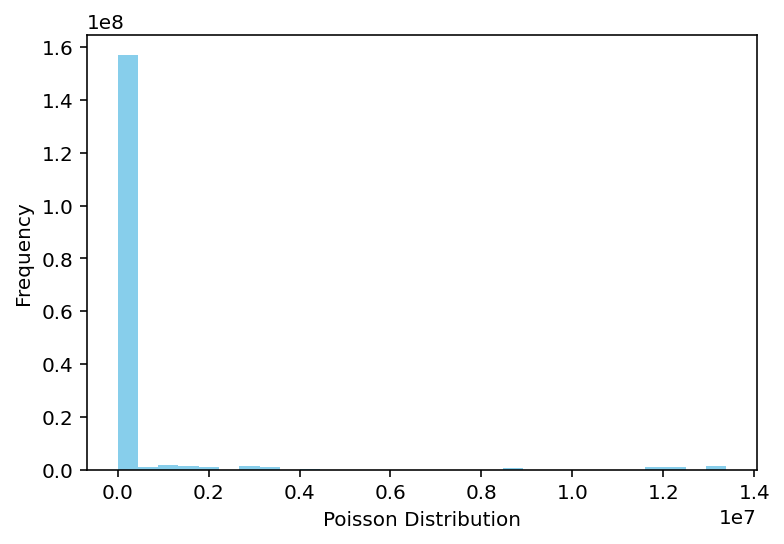

In [41]:
#Distrubuição Poisson da Dataset
ax = sns.distplot(data,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

In [42]:
#correlação
data.corr()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
MONTH,1.000000,0.006727,-0.019049,-0.000650,-0.002561,0.016712,0.022951,0.003155,0.000090,0.036913,...,-0.017344,0.000293,0.013517,-0.005243,-0.003549,-0.009835,-0.056718,-0.090837,0.172790,-0.119627
DAY_OF_WEEK,0.006727,1.000000,-0.000199,0.005468,0.013550,-0.029812,-0.027214,0.009300,-0.001988,-0.001725,...,-0.005785,0.003262,-0.010870,-0.004834,0.005966,0.021540,-0.005140,-0.010611,0.006966,0.001663
DEP_DEL15,-0.019049,-0.000199,1.000000,0.167281,0.016289,0.117528,0.009028,0.011845,0.016082,0.026740,...,0.006220,-0.007315,-0.000439,0.018309,-0.013342,0.088974,0.051178,0.027475,-0.007552,0.050933
DEP_TIME_BLK,-0.000650,0.005468,0.167281,1.000000,-0.026919,0.743527,0.055996,-0.021984,0.012839,0.107640,...,0.008759,-0.042453,-0.034697,-0.003746,-0.081345,-0.006188,-0.006190,-0.004860,0.017129,0.004509
DISTANCE_GROUP,-0.002561,0.013550,0.016289,-0.026919,1.000000,-0.237415,-0.035572,0.447485,-0.054989,-0.013700,...,-0.138314,0.104267,-0.006485,-0.113746,0.081160,-0.013576,-0.000627,-0.008414,0.002145,0.023791
SEGMENT_NUMBER,0.016712,-0.029812,0.117528,0.743527,-0.237415,1.000000,0.014240,-0.202832,0.075980,0.042633,...,0.076003,-0.036197,-0.029846,-0.058684,-0.125193,-0.018789,-0.015218,-0.007136,0.028804,-0.023988
CONCURRENT_FLIGHTS,0.022951,-0.027214,0.009028,0.055996,-0.035572,0.014240,1.000000,-0.054131,-0.132342,0.849023,...,0.036077,-0.364696,-0.020077,0.008387,0.009078,-0.017072,-0.017692,-0.025912,0.026306,0.060739
NUMBER_OF_SEATS,0.003155,0.009300,0.011845,-0.021984,0.447485,-0.202832,-0.054131,1.000000,-0.049387,0.003574,...,-0.102969,0.058096,-0.142000,-0.134491,0.051274,-0.015858,-0.009133,-0.017261,0.059657,-0.018046
CARRIER_NAME,0.000090,-0.001988,0.016082,0.012839,-0.054989,0.075980,-0.132342,-0.049387,1.000000,-0.134015,...,0.043921,0.126469,-0.000379,-0.071756,0.065909,-0.015638,0.013466,0.000797,0.000412,0.023079
AIRPORT_FLIGHTS_MONTH,0.036913,-0.001725,0.026740,0.107640,-0.013700,0.042633,0.849023,0.003574,-0.134015,1.000000,...,0.027185,-0.402696,-0.026429,-0.028085,0.011825,-0.011491,-0.010146,-0.031369,0.038357,0.073653


In [43]:
#covariação
data.cov()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
MONTH,11.538610,0.045589,-0.025341,-0.010795,-2.072032e-02,0.099792,1.676982e+00,4.978323e-01,1.575044e-03,1.108415e+03,...,-4.086075e-01,2.713154e-02,1.193962e+00,-4.722753e-01,-1.044432e+00,-9.940698e-01,-0.568641,-0.318295,1.184462e+01,-6.921712e+00
DAY_OF_WEEK,0.045589,3.980825,-0.000156,0.053309,6.440461e-02,-0.104561,-1.167954e+00,8.619445e-01,-2.039472e-02,-3.042056e+01,...,-8.005980e-02,1.775869e-01,-5.639444e-01,-2.557240e-01,1.031330e+00,1.278806e+00,-0.030266,-0.021839,2.804589e-01,5.652045e-02
DEP_DEL15,-0.025341,-0.000156,0.153369,0.320127,1.519675e-02,0.080909,7.604874e-02,2.154882e-01,3.238765e-02,9.257206e+01,...,1.689333e-02,-7.815853e-02,-4.469501e-03,1.901245e-01,-4.526648e-01,1.036804e+00,0.059155,0.011099,-5.968281e-02,3.397634e-01
DEP_TIME_BLK,-0.010795,0.053309,0.320127,23.878928,-3.133654e-01,6.386888,5.885937e+00,-4.990196e+00,3.226392e-01,4.649681e+03,...,2.968562e-01,-5.659982e+00,-4.408974e+00,-4.854127e-01,-3.443753e+01,-8.997331e-01,-0.089271,-0.024498,1.689133e+00,3.752831e-01
DISTANCE_GROUP,-0.020720,0.064405,0.015197,-0.313365,5.675033e+00,-0.994209,-1.822828e+00,4.951862e+01,-6.736631e-01,-2.884944e+02,...,-2.285289e+00,6.776900e+00,-4.017196e-01,-7.185116e+00,1.675031e+01,-9.623110e-01,-0.004410,-0.020677,1.031100e-01,9.653808e-01
SEGMENT_NUMBER,0.099792,-0.104561,0.080909,6.386888,-9.942085e-01,3.090086,5.384700e-01,-1.656258e+01,6.868550e-01,6.624808e+02,...,9.266315e-01,-1.736015e+00,-1.364305e+00,-2.735404e+00,-1.906606e+01,-9.827791e-01,-0.078955,-0.012940,1.021781e+00,-7.182701e-01
CONCURRENT_FLIGHTS,1.676982,-1.167954,0.076049,5.885937,-1.822828e+00,0.538470,4.627059e+02,-5.408812e+01,-1.463963e+01,1.614411e+05,...,5.382429e+00,-2.140340e+02,-1.122997e+01,4.783871e+00,1.691759e+01,-1.092706e+01,-1.123245,-0.574960,1.141927e+01,2.225489e+01
NUMBER_OF_SEATS,0.497832,0.861944,0.215488,-4.990196,4.951862e+01,-16.562580,-5.408812e+01,2.157800e+03,-1.179775e+01,1.467417e+03,...,-3.317423e+01,7.362893e+01,-1.715255e+02,-1.656579e+02,2.063458e+02,-2.191865e+01,-1.252117,-0.827106,5.592377e+01,-1.427916e+01
CARRIER_NAME,0.001575,-0.020395,0.032388,0.322639,-6.736631e-01,0.686855,-1.463963e+01,-1.179775e+01,2.644608e+01,-6.092213e+03,...,1.566550e+00,1.774445e+01,-5.061626e-02,-9.784771e+00,2.936424e+01,-2.392907e+00,0.204391,0.004230,4.280553e-02,2.021624e+00
AIRPORT_FLIGHTS_MONTH,1108.414801,-30.420560,92.572061,4649.680892,-2.884944e+02,662.480759,1.614411e+05,1.467417e+03,-6.092213e+03,7.814199e+07,...,1.666693e+03,-9.712235e+04,-6.075134e+03,-6.583077e+03,9.056189e+03,-3.022483e+03,-264.727107,-286.040134,6.842563e+03,1.109018e+04


<AxesSubplot:>

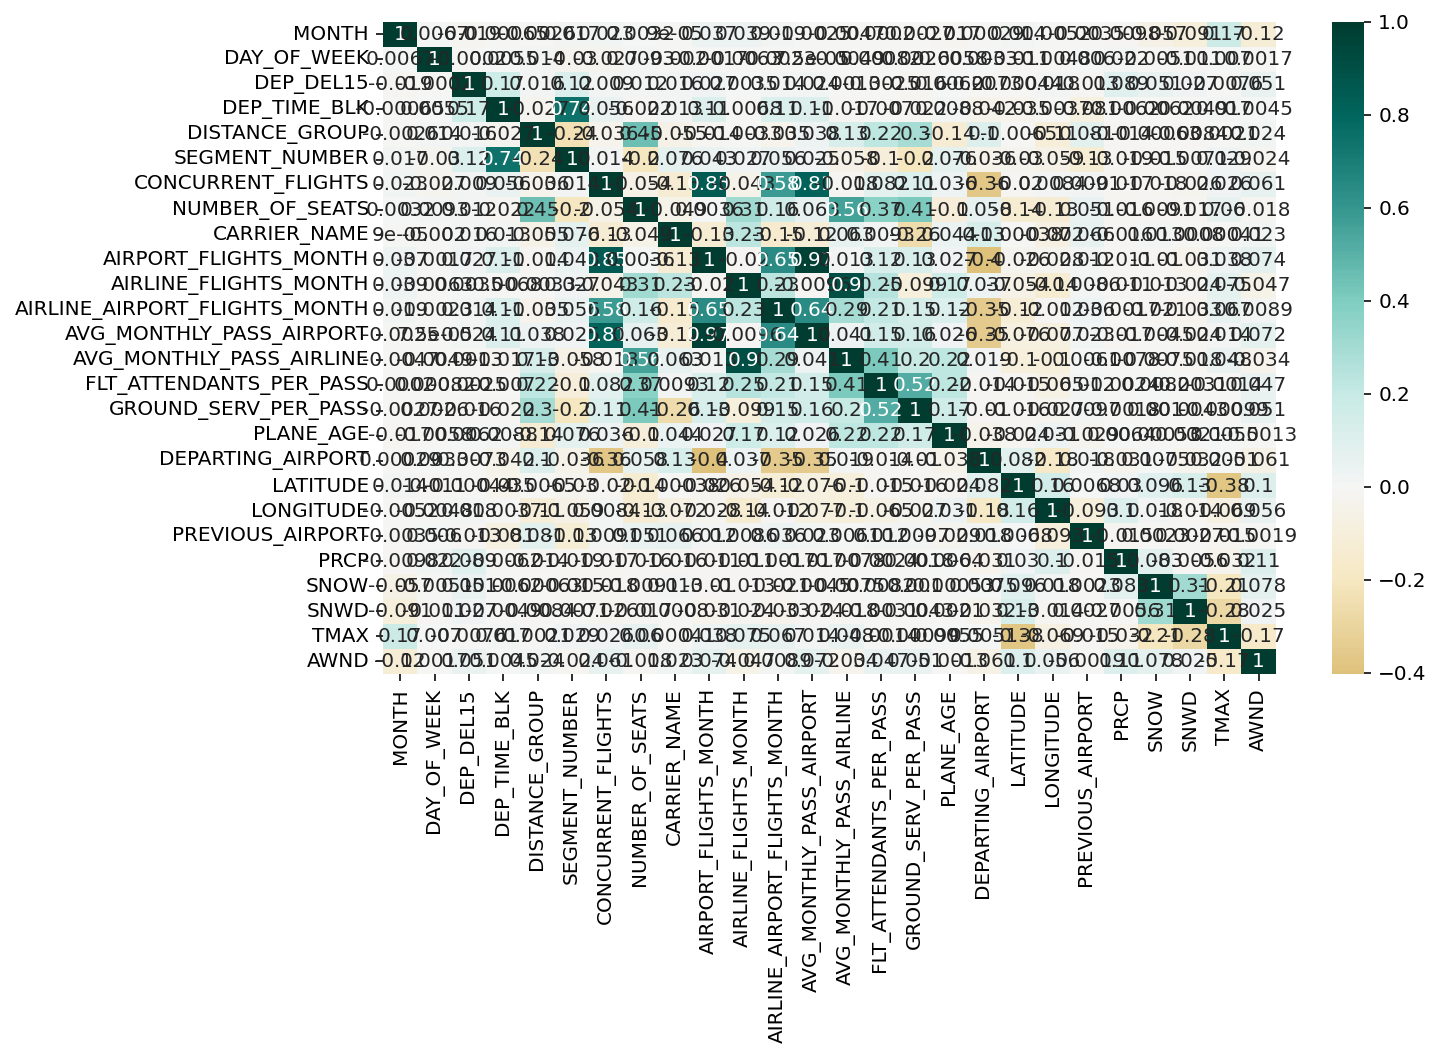

In [44]:
#heatmap
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(), center=0, cmap='BrBG', annot=True)

In [13]:
feature_cols = ['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'AWND']
X = data[feature_cols] # Features
y = data.DAY_OF_WEEK# Target variable

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [15]:
forest = RandomForestClassifier(n_estimators=10, max_depth= 6)
forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=10)

In [48]:
# Extract the small tree
tree_small = forest.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_cols, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [49]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test)


In [50]:
# View accuracy score
accuracy_score(y_test, y_pred_test)


0.6994270873197416

In [51]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[290048,      0,      0,      0,      0,      0,      0],
       [     0, 270349,  12490,      0,    138,      0,      0],
       [     0,   5666, 275967,     35,      0,      0,      0],
       [     0,      0,    216,  80336, 205347,     81,    695],
       [     0,      7,    442,  37561, 251974,    217,    996],
       [    76,     94,    431,  24447, 169749,  36274,   6522],
       [     0,      0,      0,   8633, 102758,   8530, 156640]],
      dtype=int64)

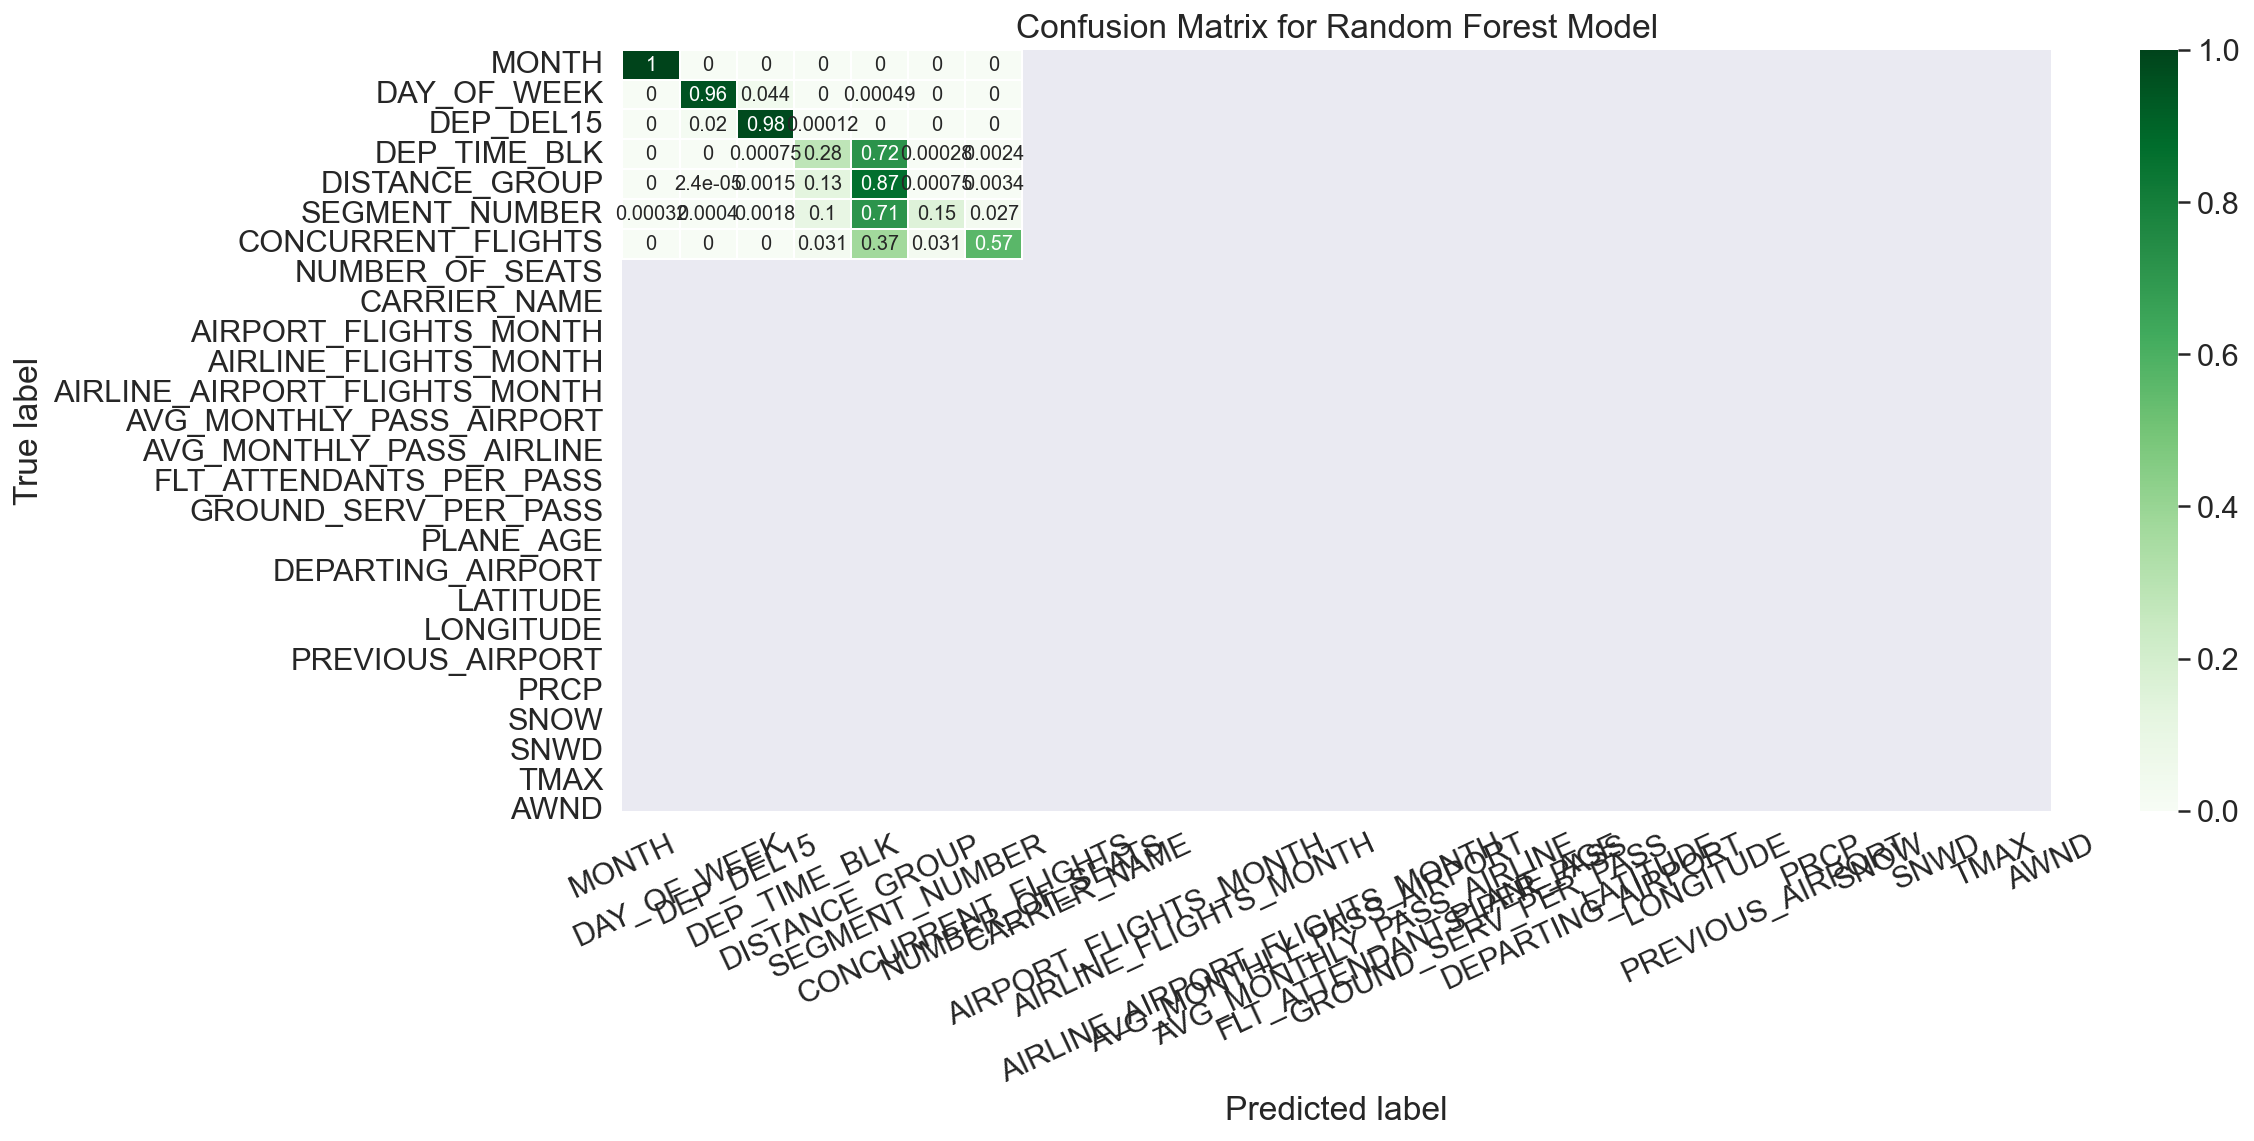

In [52]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names =  ['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'AWND']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [53]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    290048
           2       0.98      0.96      0.97    282977
           3       0.95      0.98      0.97    281668
           4       0.53      0.28      0.37    286675
           5       0.35      0.87      0.49    291197
           6       0.80      0.15      0.26    237593
           7       0.95      0.57      0.71    276561

    accuracy                           0.70   1946719
   macro avg       0.79      0.69      0.68   1946719
weighted avg       0.79      0.70      0.69   1946719



In [25]:
train_probs = forest.predict_proba(X_train)[:,1] 
probs = forest.predict_proba(X_test)[:, 1]
train_predictions = forest.predict(X_train)

In [ ]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype
---  ------                         -----
 0   MONTH                          int64
 1   DAY_OF_WEEK                    int64
 2   DEP_DEL15                      int64
 3   DEP_TIME_BLK                   int32
 4   DISTANCE_GROUP                 int64
 5   SEGMENT_NUMBER                 int64
 6   CONCURRENT_FLIGHTS             int64
 7   NUMBER_OF_SEATS                int64
 8   CARRIER_NAME                   int32
 9   AIRPORT_FLIGHTS_MONTH          int64
 10  AIRLINE_FLIGHTS_MONTH          int64
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64
 12  AVG_MONTHLY_PASS_AIRPORT       int64
 13  AVG_MONTHLY_PASS_AIRLINE       int64
 14  FLT_ATTENDANTS_PER_PASS        int64
 15  GROUND_SERV_PER_PASS           int64
 16  PLANE_AGE                      int64
 17  DEPARTING_AIRPORT              int32
 18  LATITUDE                       int64
 19  

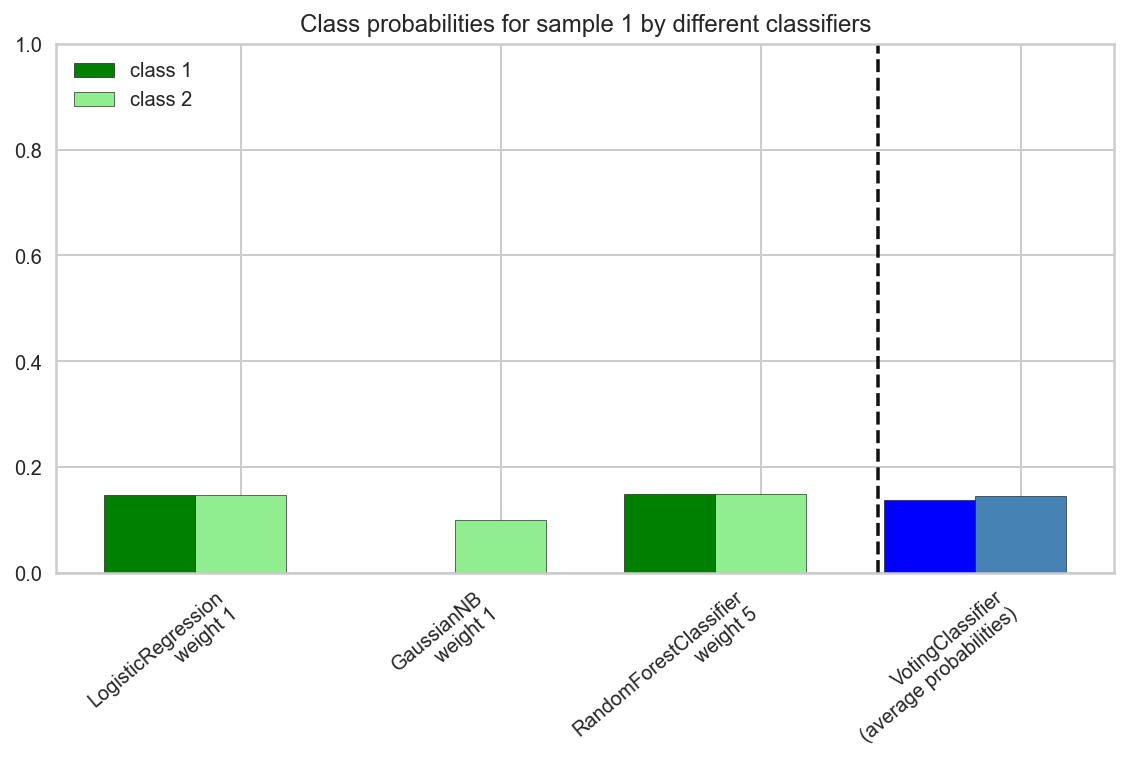

In [32]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(max_iter=1000, random_state=123)
clf3 = GaussianNB()


eclf = VotingClassifier(
    estimators=[("lr", clf1), ("rf", forest), ("gnb", clf3)],
    voting="soft",
    weights=[1, 1, 5],
)

# predict class probabilities for all classifiers
probas = [c.fit(X_train, y_train).predict_proba(X_test) for c in (clf1, forest, clf3, eclf)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color="green", edgecolor="k")
p2 = ax.bar(
    ind + width,
    np.hstack(([class2_1[:-1], [0]])),
    width,
    color="lightgreen",
    edgecolor="k",
)

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width, color="blue", edgecolor="k")
p4 = ax.bar(
    ind + width, [0, 0, 0, class2_1[-1]], width, color="steelblue", edgecolor="k"
)

# plot annotations
plt.axvline(2.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    [
        "LogisticRegression\nweight 1",
        "GaussianNB\nweight 1",
        "RandomForestClassifier\nweight 5",
        "VotingClassifier\n(average probabilities)",
    ],
    rotation=40,
    ha="right",
)
plt.ylim([0, 1])
plt.title("Class probabilities for sample 1 by different classifiers")
plt.legend([p1[0], p2[0]], ["class 1", "class 2"], loc="upper left")
plt.tight_layout()
plt.show()

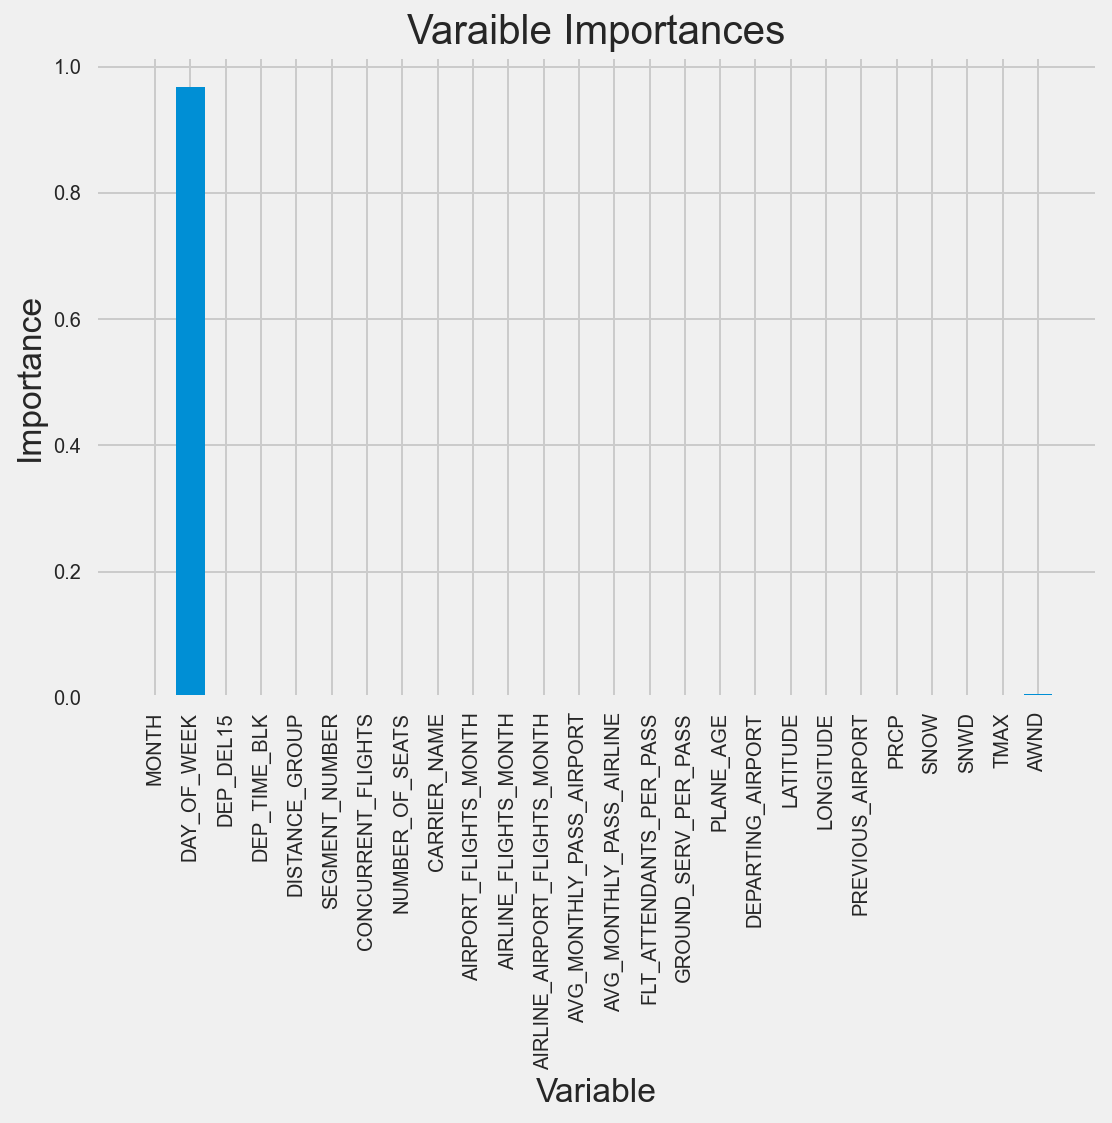

In [18]:
plt.style.use('fivethirtyeight')
importances = list(forest.feature_importances_)
x_values = list(range(len(importances)))

plt.bar(x_values,importances, orientation= 'vertical')
plt.xticks(x_values, feature_cols, rotation='vertical')

plt.ylabel('Importance'); 
plt.xlabel('Variable');
plt.title('Varaible Importances');

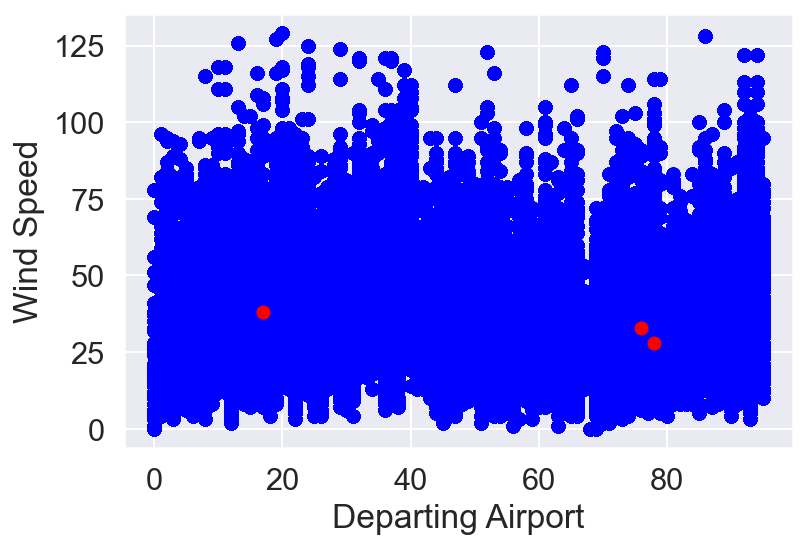

In [89]:
# number of centriod
K=3

# select random observation as a centriod 
Centroids = (data.sample(n=K))
plt.scatter(data["DEPARTING_AIRPORT"], data["AWND"], c="blue")
plt.scatter(Centroids["DEPARTING_AIRPORT"], Centroids["AWND"], c="red")
plt.xlabel("Departing Airport")
plt.ylabel("Wind Speed")
plt.show()

In [83]:
Centroids

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
3305835,7,6,1,10,2,6,63,50,13,35086,...,18,4,28,56,14,0,0,0,97,34
1646105,4,1,0,16,4,5,17,178,15,11972,...,5,57,10,66,68,0,0,0,96,40
3148945,6,1,1,12,3,6,14,143,14,7052,...,12,10,77,48,253,0,0,0,71,35


In [85]:
diff = 1
j=0

while(diff!=0):
    XD=data
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["DEPARTING_AIRPORT"]-row_d["DEPARTING_AIRPORT"])**2
            d2 = (row_c["AWND"]-row_d["AWND"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        data[i] = ED
        i = i+1
    
    C = []
    for index, row in data.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    data["Cluster"]=C
    Centroids_new = data.groupby(["Cluster"]).mean()[["AWND", "DEPARTING_AIRPORT"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['AWND'] - Centroids['AWND']).sum() + (Centroids_new['DEPARTING_AIRPORT'] - Centroids['DEPARTING_AIRPORT']).sum()
        print(diff.sum())
    Centroids = data.groupby(["Cluster"]).mean()[["AWND","DEPARTING_AIRPORT"]]

13.84444502090576
12.316564219518263
7.531643253315794
5.987145163219266
4.425992105503372
3.1085023761413346
1.9736224907643631
1.2434092620610535
0.8292449654734249
0.6961751055321734
0.36726468955193425
0.1034145220244902
0.12646829254675396
0.08058478091840371
-0.010172428444001014
0.0


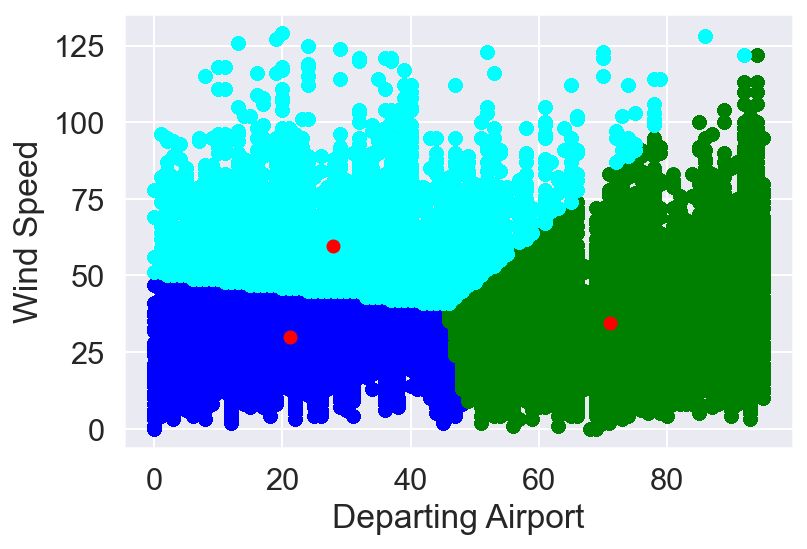

In [87]:
color=['blue','green','cyan']
for k in range(K):
    datas=data[data["Cluster"]==k+1]
    plt.scatter(datas["DEPARTING_AIRPORT"],datas["AWND"],c=color[k])
plt.scatter(Centroids["DEPARTING_AIRPORT"],Centroids["AWND"],c='red')
plt.xlabel('Departing Airport')
plt.ylabel('Wind Speed')
plt.show()

In [91]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

C:\Users\joao\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\joao\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\joao\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\joao\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\joao\anaconda3\lib\site

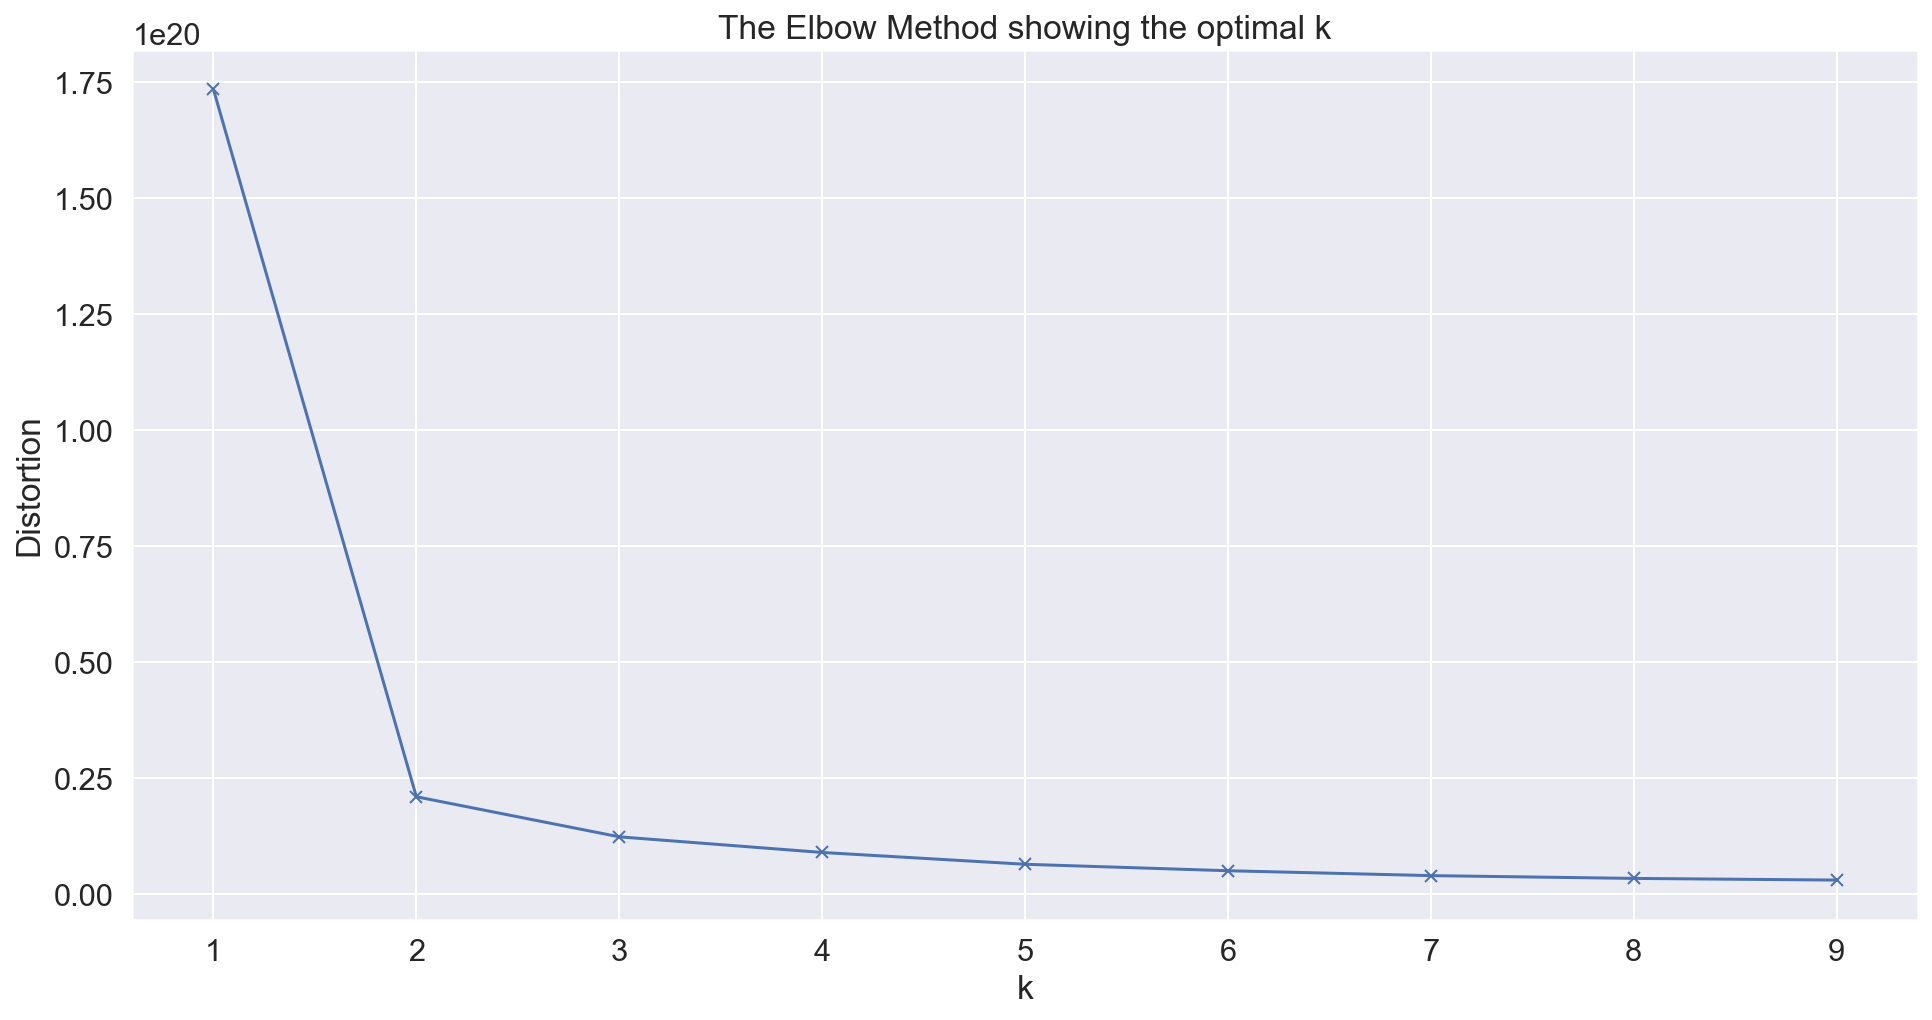

In [92]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

C:\Users\joao\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KeyboardInterrupt: 

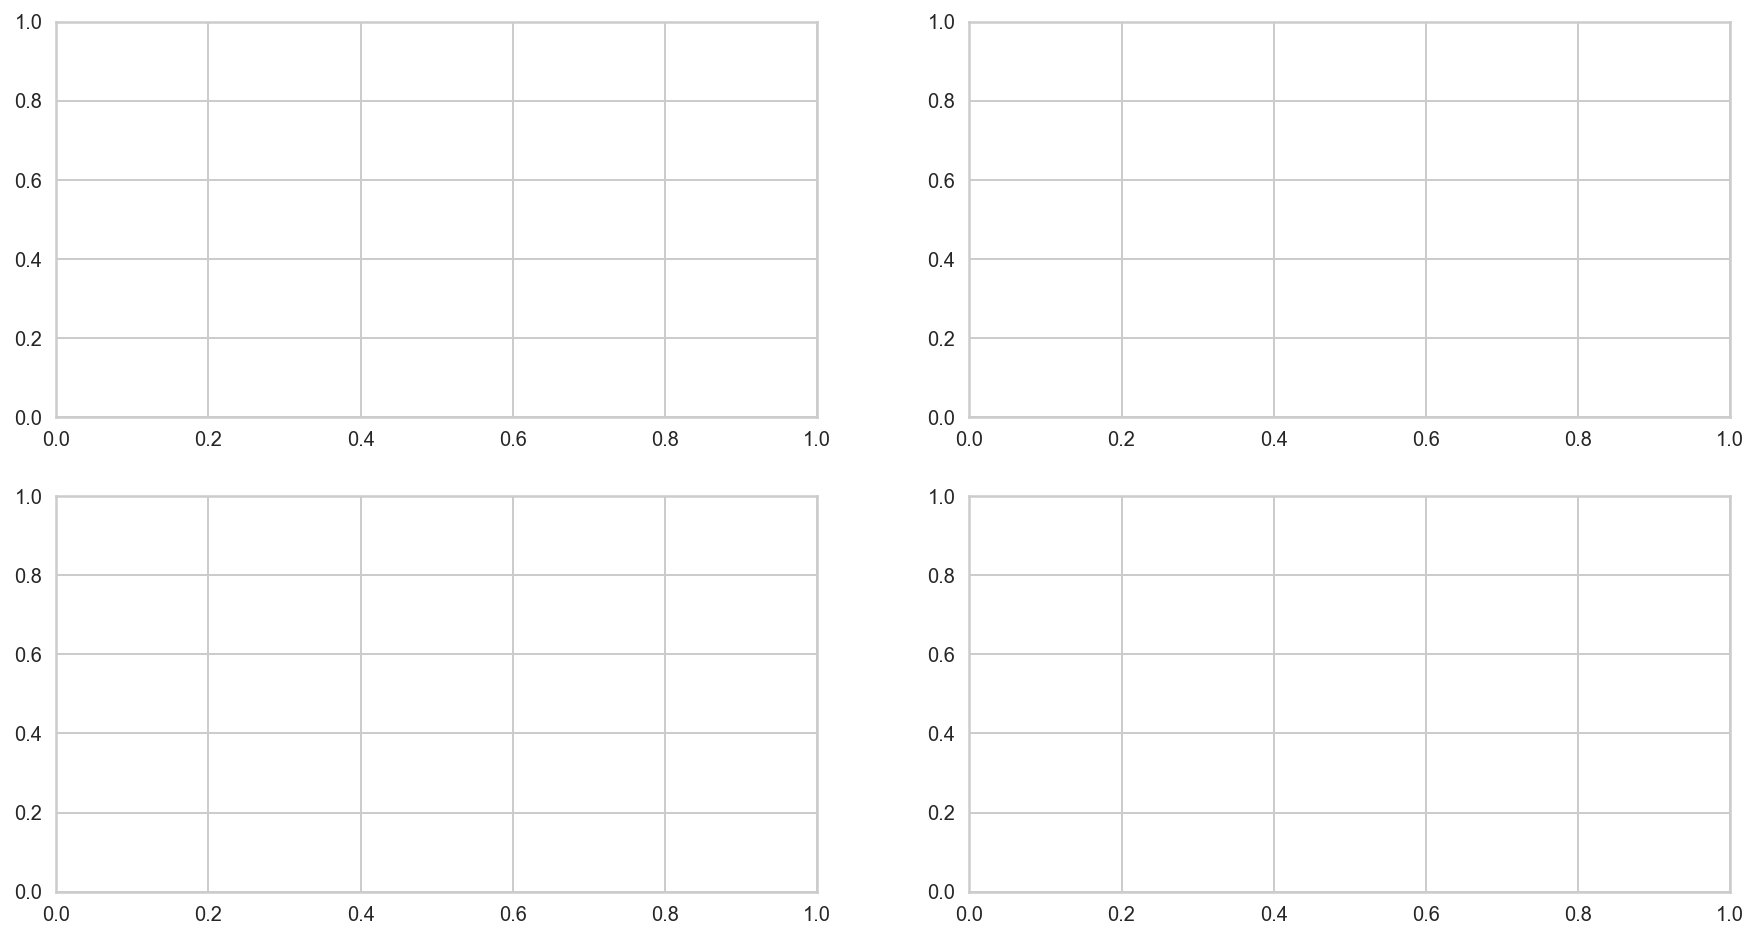

In [99]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(kmeanModel, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data)